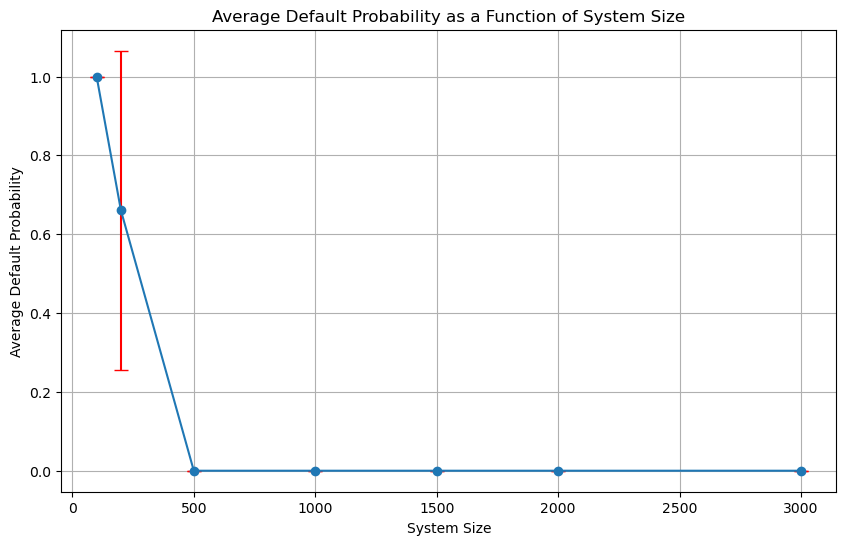

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np

def load_and_process_csv(file_path):
    df = pd.read_csv(file_path)
    file_name = os.path.basename(file_path)
    system_size_match = re.search(r'^(\d+)_', file_name)
    if system_size_match:
        system_size = int(system_size_match.group(1))
    else:
        raise ValueError(f"System size could not be determined from file name: {file_name}")
    num_bankrupt_agents = df['Number of Bankrupt Agents Over Time'].apply(lambda x: eval(x)[-1])
    return system_size, num_bankrupt_agents

def calculate_default_probability(num_bankrupt_agents, system_size, threshold=0.6):
    num_defaults = num_bankrupt_agents[num_bankrupt_agents >= threshold * system_size].count()
    return num_defaults / len(num_bankrupt_agents)

folder_path = 'D:\CLS\Intro\FinancialNetwork\Data'
results = {}

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        system_size, num_bankrupt_agents = load_and_process_csv(file_path)
        default_probability = calculate_default_probability(num_bankrupt_agents, system_size)
        results.setdefault(system_size, []).append(default_probability)

average_default_probabilities = {}
std_default_probabilities = {}
for size, probs in results.items():
    average_default_probabilities[size] = np.mean(probs)
    std_default_probabilities[size] = np.std(probs)

system_sizes = sorted(average_default_probabilities.keys())
average_probs = [average_default_probabilities[size] for size in system_sizes]
std_probs = [std_default_probabilities[size] for size in system_sizes]

plt.figure(figsize=(10, 6))
plt.errorbar(system_sizes, average_probs, yerr=std_probs, fmt='o', capsize=5, ecolor='red', linestyle='-')
plt.xlabel('System Size')
plt.ylabel('Average Default Probability')
plt.title('Average Default Probability as a Function of System Size')
plt.grid(True)
plt.show()